In [18]:
import AdaNet_CIFAR_10_feature_extraction as AdaFE

In [19]:
# example implementation
# cat_dog = CF10_pairs('cat','dog')

# start_time = time.time()
# X_train, y_train, X_test, y_test = train_test_dataset(cat_dog)
# print(time.time() - start_time)

In [20]:
cat_dog = AdaFE.CF10_pairs('cat','dog')

In [21]:
X_train, y_train, X_test, y_test = AdaFE.train_test_dataset(cat_dog)

In [22]:
# Logistic Regression
#----------------------------------
#
# This function shows how to use TensorFlow to
# solve logistic regression.
# y = sigmoid(Ax + b)
#
# We will use the CIFAR-10 data, specifically:
#  y = 0 first class image or 1 = second class image
#  x = features we have extracted from the images HOG (Histogram Of Gradient features) and Color histograms
#
# reg_lambda (regularization) = [0, 10e-1, 10e-2, 10e-3, 10e-4, 10e-5]
# eta (learning rate) = [10e-1, 10e-2, 10e-3, 10e-4]

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
from tensorflow.python.framework import ops
import os.path
import csv


ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [23]:
# set for reproducible results
seed = 99
np.random.seed(seed)
tf.set_random_seed(seed)

In [24]:
# Split data into train/test = 80%/20%
#train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
#test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = X_train
x_vals_test = X_test
y_vals_train = y_train
y_vals_test = y_test

In [25]:
###
# Define Tensorflow computational graph¶
###

# Declare batch size
batch_size = 100
reg_lambda = 0.1

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 155], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[155,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare loss function (Cross Entropy loss)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

# Loss function using L2 Regularization
regularizer = tf.nn.l2_loss(A)
loss = tf.reduce_mean(loss + reg_lambda * regularizer)
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [26]:
###
# Train model
###

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Actual Prediction
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [27]:
# Training loop
loss_vec = []
train_acc = []
test_acc = []
for i in range(10000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = y_vals_train[rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: y_vals_train})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: y_vals_test})
    test_acc.append(temp_acc_test)
    if (i+1)%300==0:
        print('Loss = ' + str(temp_loss))

Loss = 4.912551
Loss = 2.8842726
Loss = 1.8142352
Loss = 1.2962093
Loss = 0.99815625
Loss = 0.8651606
Loss = 0.7828652
Loss = 0.74731797
Loss = 0.7147419
Loss = 0.6912323
Loss = 0.70283157
Loss = 0.6798627
Loss = 0.66960466
Loss = 0.680996
Loss = 0.6806857
Loss = 0.6810183
Loss = 0.6985603
Loss = 0.68364054
Loss = 0.68740743
Loss = 0.67699593
Loss = 0.7080906
Loss = 0.67933303
Loss = 0.6630912
Loss = 0.6776992
Loss = 0.6640327
Loss = 0.6809395
Loss = 0.67298067
Loss = 0.6762618
Loss = 0.6815605
Loss = 0.668782
Loss = 0.6915877
Loss = 0.6772439
Loss = 0.66899186


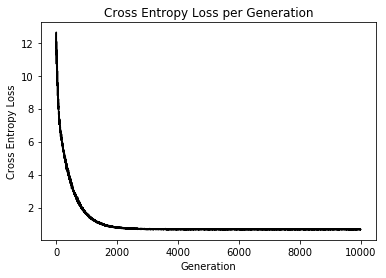

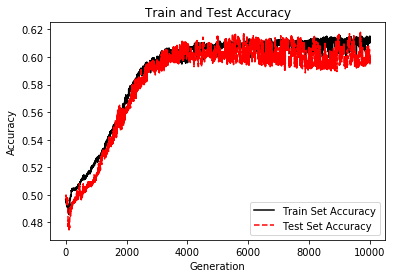

In [28]:
###
# Display model performance
###

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()

# Plot train and test accuracy
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Normalize by column (min-max norm)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

# Original data load, not relevant for AdaNet

In [49]:


###
# Obtain and prepare data for modeling
###

# name of data file
birth_weight_file = 'birth_weight.csv'

# download data and create data file if file does not exist in current directory
if not os.path.exists(birth_weight_file):
    birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
    birth_file = requests.get(birthdata_url)
    birth_data = birth_file.text.split('\r\n')
    birth_header = birth_data[0].split('\t')
    birth_data = [[float(x) for x in y.split('\t') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
    with open(birth_weight_file, "w", newline='') as f:
        writer = csv.writer(f)
        writer.writerow(birth_header)
        writer.writerows(birth_data)
        f.close()

# read birth weight data into memory
birth_data = []
with open(birth_weight_file, newline='') as csvfile:
     csv_reader = csv.reader(csvfile)
     birth_header = next(csv_reader)
     for row in csv_reader:
         birth_data.append(row)

birth_data = [[float(x) for x in row] for row in birth_data]

In [58]:
np.transpose([np.array([x[0] for x in birth_data])]).shape

(189, 1)

In [48]:
for x in birth_data:
    print (x)
    break

[]


In [ ]:

# Pull out target variable
y_vals = np.array([x[0] for x in birth_data])
# Pull out predictor variables (not id, not target, and not birthweight)
x_vals = np.array([x[1:8] for x in birth_data])